#**Pixel Art with Color Dithering**

## Group 4:
Laia Alcalde María

Elena Gutiérrez Del Burgo

David Liu Yang

Daniela Lou Pardo Mesa

Clara Priego Fernández



###**Pixel Art**

PixelArt is an artstyle created with graphical software, based on pixels as the only building block of the images. It is characterized for having a limited color palette, low resolution and ocasionally a restricted canvas size.

These factors are due to old computers' hardware. In the past they were strictly limitations and not just defining attributes. The computers just couldn't handle more complicated compositions.



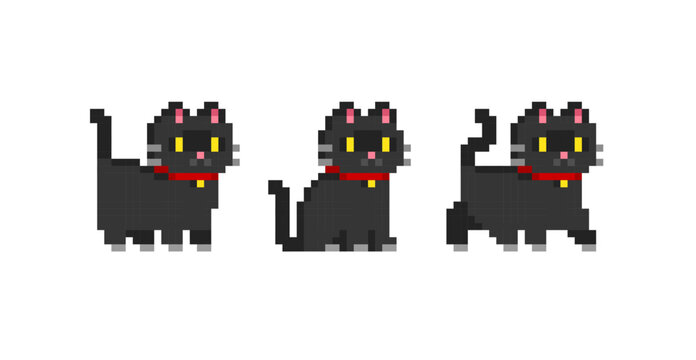


In [ ]:
vcx

In this notebook we will explore how Pixel Art works. We will start by understanding its key features:  
- **Pixel-by-pixel creation**: Each pixel is intentionally placed.
- **Low resolution**: Small images with limited detail.
- **Limited color palette**: Restricted set of colors for the final composition.

###**Pixel-by-pixel creation**

Although its flexibility allows it to take numerous forms, the **main** trait of PixelArt is the fact that each pixel position was deliberate and thought out.


Pixel-by-pixel creation instead of utilizing automated tools or filters, each individual pixel of a picture is specified by hand. This method is essential to pixel art since it gives you exact control over color and pattern, so you can produce intricate low-resolution images.


##**Color Dithering**

Color Dithering is used to create  colors and shades that are impossible thanks to a limited palette. Instead of using the actual color, dithering combines pixels of various tones to give the **illusion** of a new shade. This way, even with few colors, you can achive a **more detailed and smoother** look.


(possible videos we can put in class)
https://www.youtube.com/watch?v=pgPDGIOJZd4&t=32s

# **Game 1**

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For displaying images
import ipywidgets as widgets  # For creating interactive widgets (buttons)
from IPython.display import display, clear_output  # For updating output dynamically
from PIL import Image  # For opening and processing images
import random  # For shuffling images randomly

# Load images
images = [
    ("monkey_island_dithering.jpg", True),
    ("doom_dithering.jpg", True),
    ("prince_of_persia_no_dithering.jpg", False),
    ("modern_game_no_dithering.jpg", False)
]

# Shuffle the images randomly to vary the order
random.shuffle(images)

# Initialize game variables
current_index = 0  # Tracks the current image index, progress
score = 0  # Stores the player's score
output = widgets.Output()  # Widget to display feedback messages

# Function to display an image based on the current index
def display_image(index):
    with output:  # Ensures output is displayed in the output widget
        clear_output(wait=True)  # Clears previous output to refresh display
        img = Image.open(images[index][0])  # Opens the image file
        plt.figure(figsize=(12, 12))  # Sets the figure size
        plt.imshow(img)  # Displays the image
        plt.axis("off")  # Removes axis labels for a cleaner display
        plt.show()  # Renders the image

# Function to check the user's answer
def check_answer(answer):
    global current_index, score  # Access global variables to update them
    correct = images[current_index][1]  # Get the correct answer for the current image

    with output:
        if answer == correct:  # Check if the user's answer matches the correct answer
            print("Correct!")  # Print a success message
            score += 1  # Increase score
        else:
            print("Incorrect")  # Print an incorrect message

    # Move to the next image
    current_index += 1
    if current_index < len(images):  # If there are more images left
        display_image(current_index)  # Display the next image
    else:  # If all images have been shown, end the game
        with output:
            print(f"Game over. Score: {score}/{len(images)}")  # Display final score

# Create interactive buttons for user input
button_dithering = widgets.Button(description="Has dithering")  # Button for "Has dithering"
button_no_dithering = widgets.Button(description="No dithering")  # Button for "No dithering"

# Assign event handlers to buttons (when clicked, they call check_answer)
button_dithering.on_click(lambda b: check_answer(True))
button_no_dithering.on_click(lambda b: check_answer(False))

# Start the game by displaying the first image and the interactive elements
display_image(current_index)  # Show the first image
display(output, button_dithering, button_no_dithering)  # Display output area and buttons

Output()

Button(description='Has dithering', style=ButtonStyle())

Button(description='No dithering', style=ButtonStyle())

###**Zoom demostration**

This code showcases the basis of how dithering works: how our eyes tend to blur things, in this case colors, the further or smaller they get. Here we create a matrix that alternates between RED and BLUE. The smaller the size block is, the better is the colors' distinction. Doing the opposite, the result is as expected. Instead of the two colors, we perceive the combination of the two; PURPLE.

In [1]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from ipywidgets import interact

def create_pixel_art(width, height, colors):
    """
    Create a pixel art representation by setting individual pixels.
    :param width: Width of the canvas
    :param height: Height of the canvas
    :param colors: List of colors for the pixel grid
    :return: None
    """
    # Create an empty grid (canvas) with a white background
    pixel_art = np.ones((height, width, 3), dtype=int) * 255  # White background

    # Fill the grid with colors by alternating between two colors
    for y in range(height):
        for x in range(width):
            pixel_art[y, x] = colors[(x + y) % 2]  # Alternate between two colors

    return pixel_art

# Colors (Red and Blue)
colors = [(255, 0, 0), (0, 0, 255)]
image = create_pixel_art(150, 150, colors)

# Size of the image
y, x, z = image.shape

def update(block=0.5):
    """
    Shows a square block of the image. It is determined by a %zoom of the x size.
    zoom: percentage that will be shown
    """
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    axs.imshow(image)  # Display the image
    axs.set_ylim(0, x*block)  # Set the limits for the vertical axis based on zoom
    axs.set_xlim(0, x*block)  # Set the limits for the horizontal axis based on zoom
    axs.set_frame_on(False)  # Remove the frame around the image
    axs.set_axis_off()  # Hide the axis
    plt.show()

# Use interact to create a slider for the zoom (block) variable
interact(update, block=(0.1, 1, 0.1));


interactive(children=(FloatSlider(value=0.5, description='block', max=1.0, min=0.1), Output()), _dom_classes=(…

# **Game 2**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

def apply_dithering(image_path, num_colors=12):
    """Applies dithering to an image by reducing its number of colors."""
    image = Image.open(image_path).convert('RGB')
    dithered = image.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    return image, dithered.convert('RGB')

def generate_palette_options(original_image, num_options=3, colors_per_palette=5):
    """Generates color palette options for the game, ensuring they all have the same size."""
    full_palette = np.array(original_image.convert('P', palette=Image.ADAPTIVE, colors=num_options * colors_per_palette).getpalette()).reshape(-1, 3)

    correct_palette = [tuple(full_palette[i]) for i in range(colors_per_palette)]
    other_palettes = []

    used_indices = set(range(colors_per_palette))
    while len(other_palettes) < num_options - 1:
        indices = random.sample(range(len(full_palette)), colors_per_palette)
        if not any(i in used_indices for i in indices):
            other_palettes.append([tuple(full_palette[i]) for i in indices])
            used_indices.update(indices)

    options = [correct_palette] + other_palettes
    random.shuffle(options)

    return correct_palette, options

def create_palette_image(palette):
    """Creates an image of the color palette."""
    palette_img = np.zeros((30, 150, 3), dtype=np.uint8)  # Increased size for better visibility
    step = 150 // len(palette)
    for i, color in enumerate(palette):
        palette_img[:, i * step:(i + 1) * step] = color
    return palette_img

def display_game(image_path):
    """Displays the game in Jupyter Notebook."""
    original, dithered = apply_dithering(image_path)
    correct_palette, options = generate_palette_options(original)

    # Show dithered image with larger size
    plt.figure(figsize=(8, 8))  # Increased figure size for better visibility
    plt.imshow(dithered)
    plt.axis('off')
    plt.show()

    # Create buttons with color palettes
    buttons = []
    output = widgets.Output()

    def on_click(selected_palette):
        with output:
            output.clear_output()
            if selected_palette == correct_palette:
                print("✅ Correct! This is the original palette of the image.")
                # Mostrar imagen original con mayor tamaño
                plt.figure(figsize=(8, 8))  # Increased figure size for better visibility
                plt.imshow(original)
                plt.axis('off')
                plt.show()
            else:
                print("❌ Incorrect. Try again.")

    for palette in options:
        fig, ax = plt.subplots(figsize=(3, 1))  # Increased size of the palette display
        ax.imshow(create_palette_image(palette))
        ax.axis('off')
        plt.close(fig)  # Prevents double display

        btn = widgets.Button(description="Choose this palette", layout=widgets.Layout(width='150px'))
        btn.on_click(lambda b, p=palette: on_click(p))

        buttons.append(widgets.VBox([btn, widgets.Output()]))  # Displaying button and image in the same layout

        # Display the image within the same VBox as the button
        with buttons[-1].children[1]:
            display(fig)

    display(widgets.HBox(buttons))  # Display buttons horizontally
    display(output)


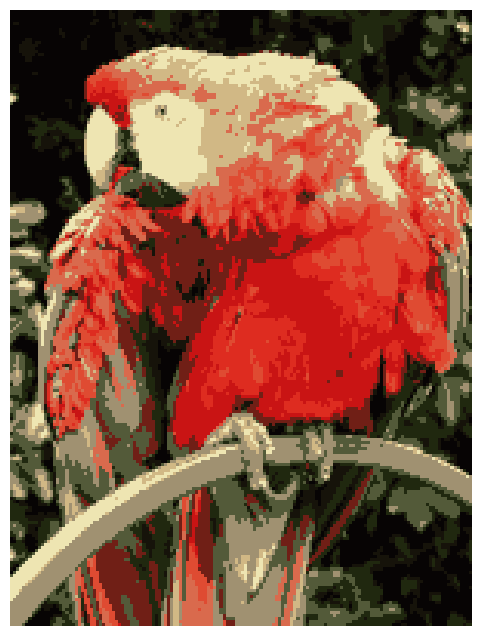

Output()

In [ ]:
image_path = 'foto.jpg'
display_game(image_path)

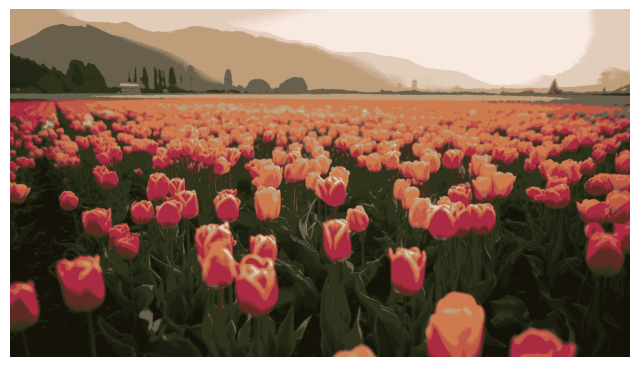

Output()

In [ ]:
image_path = 'foto3.jpg'
display_game(image_path)

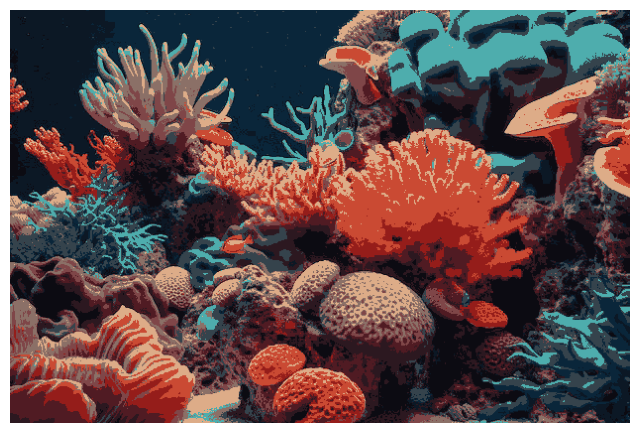

Output()

In [ ]:
image_path = 'foto2.jpg'
display_game(image_path)


###**Dithering Algorithms**
When conerting a normal image to a dithered one, there are numerous algorithms that can calculate the pixels’ new values:


*   Tresholding dithering
*   Patterning dithering
*   Random dithering
*   Ordered dithering
*   Error-difussion dithering

####**Random Dithering**

This technique involves adding random noise to the image. It's often used when a more chaotic or non-uniform pattern is desired in images, such as in artistic applications where visual style matters more than smoothness. You generate random threshold and compare them with the original image.

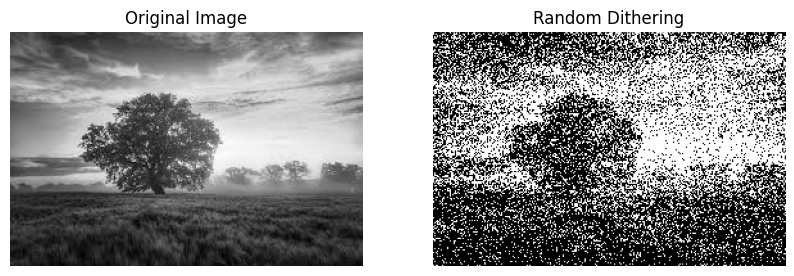

In [ ]:
# convert to grayscale
image = Image.open("tree.jpg").convert('L')
image_np = np.array(image)


def random_dithering(image_np):
    # random noise array
    noise = np.random.randint(0, 256, image_np.shape)

    #new array
    dithered_image = np.zeros_like(image_np)
    # Dither by adding random noise and clipping values between 0 and 255
    #dithered_image = np.clip(image_np + noise - 128, 0, 255)
    dithered_image[image_np > noise] = 255
    return dithered_image.astype(np.uint8)


# Apply random dithering
random_dithered_image = random_dithering(image_np)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(random_dithered_image, cmap='gray')
axes[1].set_title('Random Dithering')
axes[1].axis('off')
plt.show()


####**Ordered Dithering**

This algorithm uses a predefined matrix as a treshold to distribute color values across pixels. By grouping the orignal image in blocks of matrix's size, each pixel in the block that surpasses its corresponding value is lit; otherwise, it's not.

Common examples of matrixes are the Bayer matrix or halftone matrix. The Bayer produces a hatched pattern while the halftone imitates a newspaper's old printing look. The bigger these matrixes are, the more detailed the result is.

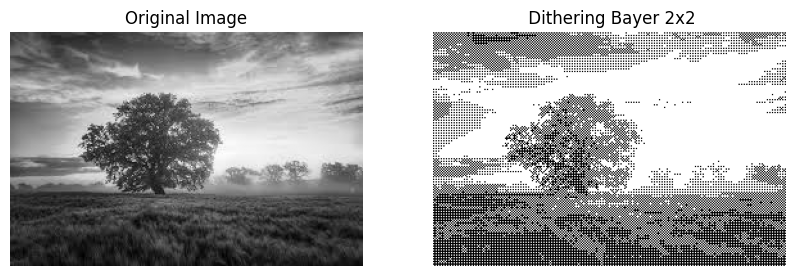

In [ ]:
# Bayer matrix 2x2 example
bayer_matrix_2x2 = np.array([[0, 2],
                             [3, 1]])

def orderly_dithering(image_np, matrix):
    # Normalize the image based on matrix size
    max_val = matrix.shape[0]**2
    image_normalized = (image_np / 255.0)
    dithered_image = np.zeros_like(image_np, dtype=np.uint8)

    # dither using the matrix pattern
    for i in range(image_np.shape[0]):
        for j in range(image_np.shape[1]):

            # Get the value from the matrix and apply it
            matrix_value = matrix[i % matrix.shape[0], j % matrix.shape[1]]
            threshold = matrix_value / (max_val)
            dithered_image[i, j] = 255 if image_normalized[i, j] > threshold else 0

    return dithered_image


orderly_dithered_image = orderly_dithering(image_np, bayer_matrix_2x2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(orderly_dithered_image, cmap='gray')
axes[1].set_title(' Dithering Bayer 2x2')
axes[1].axis('off')

plt.show()

####**Error-Difussion Dithering: Floyd Steinberg**

The Floyd-Steinberg dithering is an algorithm used to convert images with a wide range of colors into images with a limited number of colors while preserving visual details of it.
This algorithm works on images in grayscale, so the first step is to convert the image to grayscale if it’s not already. Then, it processes each pixel by checking its value as in the color scale (0 - 255). For each one it uses a threshold to compare the pixels and decide if the color assigned to the pixel will be white or black depending on which one is closer.

After that, we calculate the error (difference) between the chosen value and the original one. Instead of throwing away the error, we spread it to the surrounding pixels. This is what makes Floyd-Steinberg different from simpler dithering methods and what helps maintain the details.

For the spreading of the error, Floyd uses the diffusion matrix which has the same values for every pixel (a):

$$
\begin{bmatrix}
 & a & 7/16 \\
3/16 &  5/16 & 1/16\\
\end{bmatrix}
$$


These values were chosen to make the spread more similar to how the perceives the gradients and do it with balance. That’s why the next pixel that will be processed has the highest number (7/16).

For each pixel included in the matrix its portion of error is added to the assigned value at the beginning.

This process is made for every pixel in the image, moving left to right, top to bottom. Making each pixel affect the next, leading to a smooth diffusion of the color error across the image.


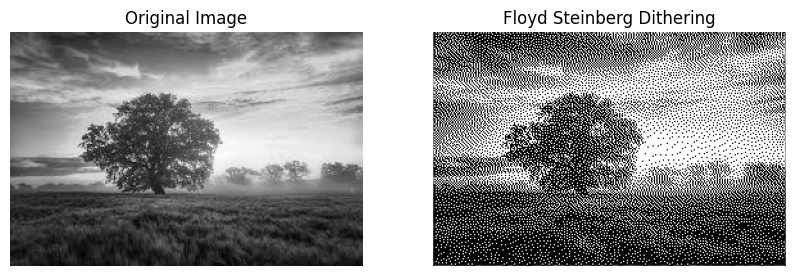

In [ ]:
def floyd_steinberg_dithering(image):
    h, w = image.shape
    img = image.astype(np.float32)  # Convert to float for error diffusion

    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            img[y, x + 1] += quant_error * 7 / 16
            img[y + 1, x - 1] += quant_error * 3 / 16
            img[y + 1, x] += quant_error * 5 / 16
            img[y + 1, x + 1] += quant_error * 1 / 16

    return np.clip(img, 0, 255).astype(np.uint8)



def apply_dithering(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = np.array(img)

    dithered_img = floyd_steinberg_dithering(img)
    return dithered_img



# Example usage:
floyd_image = apply_dithering('tree.jpg')


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(floyd_image, cmap='gray')
axes[1].set_title('Floyd Steinberg Dithering')
axes[1].axis('off')
plt.show()



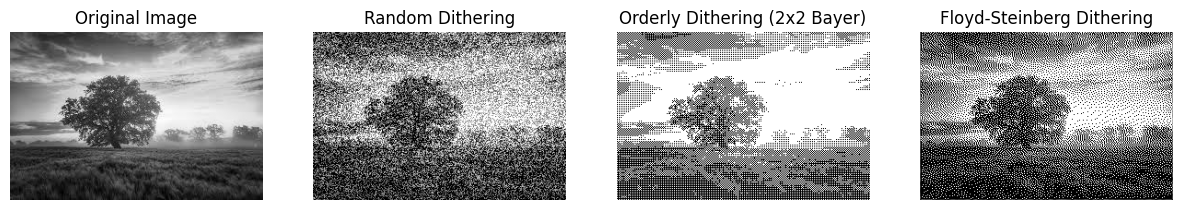

In [ ]:
# Display comparison of all dithering techniques
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(random_dithered_image, cmap='gray')
axes[1].set_title('Random Dithering')
axes[1].axis('off')
axes[2].imshow(orderly_dithered_image, cmap='gray')
axes[2].set_title('Orderly Dithering (2x2 Bayer)')
axes[2].axis('off')
axes[3].imshow(floyd_image, cmap='gray')
axes[3].set_title('Floyd-Steinberg Dithering')
axes[3].axis('off')
plt.show()


**Now we can see how the size of this image is reduced with the color dithering**

In [ ]:

def get_in_memory_image_size(image_array):
    # Convert to a PIL Image
    image = Image.fromarray(image_array.astype(np.uint8))

    # store the image in memory
    byte_io = io.BytesIO()
    image.save(byte_io, format="PNG")    # Save the image

    return len(byte_io.getvalue()) / 1024  # Size in KB


# sizes of the images in memory
original_size = get_in_memory_image_size(image_np)
random_dithered_size = get_in_memory_image_size(random_dithered_image)
orderly_dithered_size = get_in_memory_image_size(orderly_dithered_image)
floyd_steinberg_size = get_in_memory_image_size(floyd_image)

print(f"Original Image Size: {original_size:.2f} KB")
print(f"Random Dithered Image Size: {random_dithered_size:.2f} KB")
print(f"Orderly Dithered Image Size (2x2 Bayer): {orderly_dithered_size:.2f} KB")
print(f"Floyd-Steinberg Dithered Image Size: {floyd_steinberg_size:.2f} KB")

Original Image Size: 30.12 KB
Random Dithered Image Size: 43.92 KB
Orderly Dithered Image Size (2x2 Bayer): 2.83 KB
Floyd-Steinberg Dithered Image Size: 10.49 KB


# **Game 3**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load image and apply different levels of dithering with resolution reduction
def apply_dithering(image_path, num_colors, scale_factor):
    image = Image.open(image_path).convert('RGB')
    small_size = (image.width // scale_factor, image.height // scale_factor)
    image_small = image.resize(small_size, Image.NEAREST)
    dithered = image_small.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    return dithered.convert('RGB').resize(image.size, Image.NEAREST)

def display_game(image_path):
    levels = [(4, 10), (8, 8), (12, 6), (16, 4), (24, 2)]  # Fewer colors and more pixelation at the beginning
    images = [apply_dithering(image_path, n, scale) for n, scale in levels]
    original_image = Image.open(image_path).convert('RGB')  # Original image without dithering
    current_level = 0

    output = widgets.Output()

    with output:
        fig, ax = plt.subplots(figsize=(5, 5))
        img_display = ax.imshow(images[current_level])
        ax.axis('off')
        plt.show()

    button_next = widgets.Button(description='Next hint')

    def next_image(b):
        nonlocal current_level
        if current_level < len(images) - 1:
            current_level += 1
            with output:
                clear_output(wait=True)
                fig, ax = plt.subplots(figsize=(5, 5))
                ax.imshow(images[current_level])
                ax.axis('off')
                plt.show()
        else:
            with output:
                clear_output(wait=True)
                print("This was the image! 🎉")
                fig, ax = plt.subplots(figsize=(5, 5))
                ax.imshow(original_image)
                ax.axis('off')
                plt.show()

    button_next.on_click(next_image)

    display(output, button_next)


In [ ]:
image_path = 'foto4.jpg'
display_game(image_path)

Output()

Button(description='Next hint', style=ButtonStyle())

# **Challenge: Dithering Color**
Given this Floyd Steiberg algorithm that allows color dithering, modify it so that instead it works choosing from a selected palette of colors using euclidean distance.

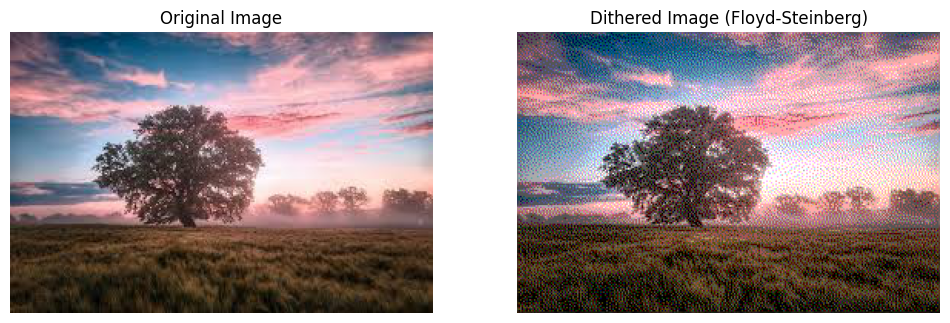

In [5]:
# Floyd Steiberg with colors
# Load an image and convert to RGB numpy array
image_jpg = Image.open("tree.jpg").convert("RGB")
image = np.array(image_jpg, dtype=np.float32)  # Convert to float for calculations

# Floyd-Steinberg error diffusion matrix
error_diffusion = [(1, 0, 7/16), (1, 1, 1/16), (0, 1, 5/16), (-1, 1, 3/16)]

# Define function for color dithering
def floyd_steinberg_dithering_color(image, num_levels=4):
    """
    Applies Floyd-Steinberg dithering to a color image.
    Args:
    - image: Input image as a NumPy array (H, W, 3).
    - num_levels: Number of color levels per channel (default: 4).

    Returns:
    - Dithered image as a NumPy array.
    """
    dithered_image = image.copy()

    # quantization step
    step = 255 / (num_levels - 1)

    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            for c in range(3):  # Process R, G, and B
                old_pixel = dithered_image[y, x, c]
                new_pixel = np.round(old_pixel / step) * step  # nearest level
                dithered_image[y, x, c] = new_pixel
                error = old_pixel - new_pixel

                # Distribute error to neighboring pixels
                for dx, dy, factor in error_diffusion:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0]:
                        dithered_image[ny, nx, c] = np.clip(dithered_image[ny, nx, c] + error * factor, 0, 255)

    return dithered_image.astype(np.uint8)
dithered_image = floyd_steinberg_dithering_color(image, num_levels=4)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_jpg)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(dithered_image)
axes[1].set_title("Dithered Image (Floyd-Steinberg)")
axes[1].axis("off")

plt.show()



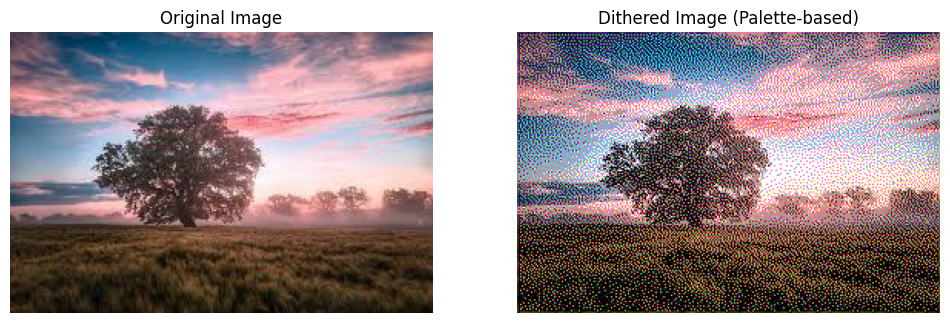

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Create the palette of colors you want to use
# The more colors you have, the better the result will be
# Recommended: black, white, red, green, blue, yellow, orange, purple, and intermediate shades
palette = [
    [0, 0, 0],       # Black
    [255, 255, 255],  # White
    [255, 0, 0],      # Red
    [0, 255, 0],      # Green
    [0, 0, 255],      # Blue
    [255, 255, 0],    # Yellow
    [255, 165, 0],    # Orange
    [128, 0, 128],    # Purple
    [255, 105, 180],  # HotPink
    [0, 255, 255],    # Cyan
    [75, 0, 130],     # Indigo
]

# Function to calculate the Euclidean distance between two RGB colors
def euclidean_distance(c1, c2):
    return np.sqrt(np.sum((np.array(c1) - np.array(c2)) ** 2))

# Function to find the closest color in the palette using Euclidean distance
def find_closest_color(pixel, palette):
    min_distance = float('inf')  # Start with an infinitely large distance
    closest_color = None
    for color in palette:
        distance = euclidean_distance(pixel, color)  # Calculate the distance between the pixel and the current color in the palette
        if distance < min_distance:  # Update if a closer color is found
            min_distance = distance
            closest_color = color
    return closest_color  # Return the closest color found in the palette

# Floyd-Steinberg dithering with palette-based color selection using Euclidean distance
def floyd_steinberg_dithering_palette(image, palette):
    """
    Applies Floyd-Steinberg dithering to an image using palette-based colors.
    Args:
    - image: Input image as a NumPy array (H, W, 3).
    - palette: List of RGB colors to use for dithering.

    Returns:
    - Dithered image as a NumPy array.
    """
    dithered_image = image.copy()  # Create a copy of the original image to apply the dithering
    error_diffusion = [(1, 0, 7 / 16), (1, 1, 1 / 16), (0, 1, 5 / 16), (-1, 1, 3 / 16)]  # Floyd-Steinberg error diffusion matrix

    for y in range(1, image.shape[0] - 1):  # Iterate over the image pixels, excluding the borders
        for x in range(1, image.shape[1] - 1):
            for c in range(3):  # Process the R, G, and B channels
                old_pixel = dithered_image[y, x, c]  # Get the current pixel value
                closest_color = find_closest_color(dithered_image[y, x], palette)  # Find the closest color from the palette
                new_pixel = np.array(closest_color)[c]  # Get the value of the closest color for the current channel
                dithered_image[y, x, c] = new_pixel  # Replace the pixel with the closest color
                error = old_pixel - new_pixel  # Calculate the error between the old and new pixel values

                # Distribute the error to neighboring pixels using the Floyd-Steinberg diffusion
                for dx, dy, factor in error_diffusion:
                    nx, ny = x + dx, y + dy  # Get the coordinates of the neighboring pixel
                    if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0]:  # Ensure the neighbor is within the image bounds
                        dithered_image[ny, nx, c] = np.clip(dithered_image[ny, nx, c] + error * factor, 0, 255)  # Update the neighbor's pixel value

    return dithered_image.astype(np.uint8)  # Return the dithered image with integer pixel values

# Load and preprocess the image
image_jpg = Image.open("tree.jpg").convert("RGB")  # Open the image and convert to RGB
image = np.array(image_jpg, dtype=np.float32)  # Convert the image to a NumPy array of type float32 for calculations

# Apply Floyd-Steinberg dithering with the color palette
dithered_image = floyd_steinberg_dithering_palette(image, palette)  # Apply dithering using the palette-based function

# Display the original and dithered images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with two images side by side
axes[0].imshow(image_jpg)  # Display the original image
axes[0].set_title("Original Image")  # Title for the original image
axes[0].axis("off")  # Turn off the axis labels

axes[1].imshow(dithered_image)  # Display the dithered image
axes[1].set_title("Dithered Image (Palette-based)")  # Title for the dithered image
axes[1].axis("off")  # Turn off the axis labels

plt.show()  # Show the plot with both images
